# ECE219 Project 2

## QUESTION 16: Using the dataset provided on Kaggle: https://www.kaggle.com/c/learn-ai-bbc

Report your process:

• data acquiring,

• feature engineering (doesn’t need to be the same as those in part 1),

• clustering,

• performance evaluation


##### Step 1 - Data Acquisition
1. In Anaconda Powershell Prompt, pip installed the Kaggle library using the command:

    $ pip install kaggle
    

2. Created Kaggle account and created/downloaded a new API token named kaggle.json to validate my credentials when importing from kaggle

3. Data was downloaded from the provided kaggle learn-ai-bbc web page and unzipped in windows.

In [11]:
import kaggle

kaggle.api.authenticate()

!kaggle competitions download -c learn-ai-bbc

learn-ai-bbc.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import pandas as pd
train_bbc=pd.read_csv('C:/Users/ohass/Downloads/learn-ai-bbc/BBC News Train.csv', engine='python')
test_bbc=pd.read_csv('C:/Users/ohass/Downloads/learn-ai-bbc/BBC News Test.csv', engine='python')

print(train_bbc.head(10))

   ArticleId                                               Text       Category
0       1833  worldcom ex-boss launches defence lawyers defe...       business
1        154  german business confidence slides german busin...       business
2       1101  bbc poll indicates economic gloom citizens in ...       business
3       1976  lifestyle  governs mobile choice  faster  bett...           tech
4        917  enron bosses in $168m payout eighteen former e...       business
5       1582  howard  truanted to play snooker  conservative...       politics
6        651  wales silent on grand slam talk rhys williams ...          sport
7       1797  french honour for director parker british film...  entertainment
8       2034  car giant hit by mercedes slump a slump in pro...       business
9       1866  fockers fuel festive film chart comedy meet th...  entertainment


In [9]:
print(test_bbc.head(10))

   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...
5         51  lewsey puzzle over disallowed try england s jo...
6       2025  blair blasts tory spending plans tony blair ha...
7       1479  former ni minister scott dies former northern ...
8         27  career honour for actor dicaprio actor leonard...
9        397  tsunami  to hit sri lanka banks  sri lanka s b...


In [80]:
train_docs=train_bbc.Text
test_docs=test_bbc.Text
bbc_cats=train_bbc.Category

#print(train_docs.head(5))
#print(test_docs.head(5))
#print(bbc_cats.head(5))
print(test_docs[8])


career honour for actor dicaprio actor leonardo dicaprio s  exceptional career  has been honoured at the santa barbara international film festival.  the star was presented with the award by martin scorsese  who directed him in oscar-nominated movie the aviator.  it s a lifetime achievement award  which is completely and utterly surreal  given i m only 30 years old   dicaprio said.  but what has it been  almost 17 years now. i ve done quite a few films.  a retrospective of his movies was shown.   what s really exciting  for me  is that this is what i really love doing   he added.  it s what i want to do for the rest of my life.  dicaprio began his movie career in horror film critters 3  before moving onto roles in the basketball diaries  romeo and juliet  titanic and gangs of new york. the achievement award was created to commemorate the california festival s 20th anniversary and coincided with dicaprio s portrayal of millionaire howard hughes in the aviator.  veteran actress jane russe

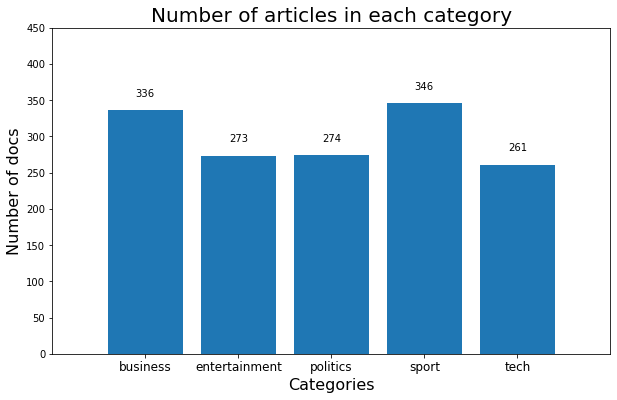

In [11]:
import numpy as np
unique_cats=list(np.unique(bbc_cats))
str_cats=map(str, unique_cats)

cats_list=bbc_cats.tolist() #list of categories 
cat_count=[]
for n in unique_cats:    #looping through raw cats list and counting unique cats
    count = cats_list.count(n)
    cat_count.append(count)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Number of articles in each category', fontsize=20)
plt.xticks(fontsize=12)
plt.xlabel('Categories', fontsize=16)
plt.ylabel('Number of docs', fontsize=16)
plt.axis([-1,5,0,450])
plt.bar(unique_cats, cat_count)


for x,y in zip(unique_cats,cat_count):
    label = "{:.0f}".format(y)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,14),
                ha='center',
                fontsize=10)

### The number of articles per category in the training data was examined to ensure no large descrepancies exist among them. They are indeed in the same general vacinity ranging between 261 and 346

##### Step 2 - Feature Engineering
Pipeline and GridSearchCV were used to optimize feature engineering for the dataset. The following parameters were considered with and without lemmatization:
min_df=3 and 5
max_df=500 (aggressive), 1000 (moderate) and, 1490 (turned off)

The training and testing articles were lemmatized using a custom stop word list combining 'english' from nltk and text.ENGLISH_STOP_WORDS from sklearn yielding a combined stop word list of 471 words. Number terms were also eliminated

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#Exploring effect of min_df & max_df on retained words - train_docs
min_dfs = range(1,5)
max_dfs = range(200, 2100, 300)
for x in min_dfs:
    count_vect_tmp = CountVectorizer(min_df=x)
    train_tmp = count_vect_tmp.fit_transform(train_docs)
    print('min_df = ', x, ' ', train_tmp.shape)


for x in max_dfs:
    count_vect_tmp = CountVectorizer(min_df=3, max_df=x)
    train_tmp = count_vect_tmp.fit_transform(train_docs)
    print('max_df = ', x, ' ', train_tmp.shape)
    

min_df =  1   (1490, 24746)
min_df =  2   (1490, 14351)
min_df =  3   (1490, 10557)
min_df =  4   (1490, 8583)
max_df =  200   (1490, 10358)
max_df =  500   (1490, 10491)
max_df =  800   (1490, 10525)
max_df =  1100   (1490, 10537)
max_df =  1400   (1490, 10552)
max_df =  1700   (1490, 10557)
max_df =  2000   (1490, 10557)


### with the above results, decided to use min_df=2 and max_df=1000

In [13]:
#Custom stop words
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
from string import punctuation

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(stop_words_skt))

In [14]:
#CountVectorizer Setup
vectorize = CountVectorizer(min_df=2, max_df=1000, stop_words=combined_stopwords)


In [15]:
#check if term is a number
def number_term(t):
    try:
        float(t)
        return True
    except ValueError:
        return False

In [16]:
#import stuff for lemmatize
import nltk
import string
from nltk import pos_tag
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#morphing penn treebank tags to WordNet
def penn_to_wordnet(ptag):
    tags = {'JJ':'a',
           'NN':'n',
           'VB':'v',
           'RB':'r'}
    try:
        return tags[ptag[:2]]
    except:
        return 'n'
    
#lemmatize single document
def lemfxn(doc):
    wnlem = nltk.wordnet.WordNetLemmatizer()
    lemmatize = []
    for word, tag in pos_tag(nltk.word_tokenize(doc)):
        if(not number_term(word)):  #removing number terms
            lemmword = wnlem.lemmatize(word.lower(), pos=penn_to_wordnet(tag))
            lemmatize.append(lemmword) 
    lem_output= ' '.join(lemmatize)
    return lem_output

#lemmetize set of docs
def lemmdata(doc):
    lemlist=[]
    for d in doc:
        lemdoc=lemfxn(d)  #lemm function
        lemlist.append(lemdoc)  #build lemmatized doc list
    return lemlist



In [17]:
#vectorize lemmetized documents
lemvectrain=vectorize.fit_transform(lemmdata(train_docs))
lemvectest=vectorize.transform(lemmdata(test_docs))

print(lemvectrain.shape)
print(lemvectest.shape)

(1490, 11010)
(735, 11010)


In [18]:
#applying the tf-idf transformer to both datasets

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

train_tfidf = tfidf_transformer.fit_transform(lemvectrain)
test_tfidf = tfidf_transformer.transform(lemvectest)

In [107]:
print(unique_cats)
#cat_num=list(range(5))
#print(cat_num)
#cat_index=zip(unique_cats, cat_num)
#print(cat_index)


['business', 'entertainment', 'politics', 'sport', 'tech']


In [19]:
cat_index=[]
for i in bbc_cats:
    if i == 'business': cat_index.append(0)
    if i == 'entertainment': cat_index.append(1)
    if i == 'politics': cat_index.append(2)
    if i == 'sport': cat_index.append(3)
    if i == 'tech': cat_index.append(4)

        
print(cat_index)

[0, 0, 0, 4, 0, 2, 3, 1, 0, 1, 2, 1, 0, 0, 3, 3, 1, 3, 3, 4, 3, 1, 3, 3, 4, 0, 4, 3, 2, 0, 4, 1, 0, 2, 3, 1, 3, 3, 3, 4, 4, 3, 3, 4, 1, 1, 4, 4, 4, 0, 4, 3, 2, 3, 3, 1, 0, 0, 2, 3, 4, 0, 1, 4, 0, 3, 2, 2, 4, 4, 3, 4, 3, 3, 3, 0, 3, 0, 1, 0, 4, 0, 2, 2, 3, 3, 2, 1, 3, 3, 2, 4, 2, 3, 2, 0, 0, 0, 0, 3, 0, 2, 4, 4, 1, 2, 4, 0, 0, 0, 0, 1, 3, 0, 0, 0, 2, 0, 2, 3, 4, 3, 3, 2, 4, 4, 1, 3, 2, 0, 3, 0, 1, 3, 4, 1, 2, 0, 3, 1, 1, 0, 0, 3, 4, 2, 0, 0, 3, 1, 3, 3, 2, 2, 4, 0, 0, 1, 4, 1, 2, 4, 1, 3, 0, 2, 1, 3, 2, 3, 4, 1, 3, 1, 0, 0, 1, 2, 0, 3, 3, 4, 3, 0, 0, 3, 0, 1, 2, 1, 1, 4, 3, 2, 3, 4, 2, 3, 3, 3, 3, 1, 3, 0, 4, 0, 2, 3, 4, 0, 0, 3, 1, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 1, 1, 3, 3, 0, 4, 1, 2, 0, 3, 0, 1, 0, 4, 3, 3, 3, 3, 3, 0, 3, 1, 0, 2, 3, 0, 2, 0, 1, 3, 3, 0, 4, 0, 4, 2, 4, 4, 0, 2, 3, 1, 1, 0, 1, 4, 1, 1, 2, 4, 3, 3, 2, 3, 4, 0, 4, 0, 4, 1, 3, 3, 3, 2, 2, 3, 3, 1, 0, 4, 3, 2, 4, 2, 2, 4, 4, 0, 4, 0, 3, 1, 0, 3, 2, 1, 4, 2, 0, 1, 0, 4, 3, 4, 3, 3, 3, 2, 0, 2, 1, 3, 1, 0, 2, 0, 3, 1, 3, 0, 

In [21]:
#Question 2
import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
pp = pprint.PrettyPrinter(indent=4)
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

###################### 'english', min_df=3, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[  0,   1,   1,   8, 326],
       [  0,   7, 217,   8,  41],
       [147,   1,   0,   4, 122],
       [  0, 342,   2,   0,   2],
       [  0,   8,   4, 238,  11]])
Homogeneity score:  0.7132108119604823
Completeness score:  0.7487005103704979
V-measure score:  0.7305248830895581
Adjusted Rand score:  0.6850252469761327
Adjusted mutual information score:  0.7295922294772749


In [22]:
#Question 2

###################### 'combined_stopwords, min_df=3, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words=combined_stopwords, min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[331,   4,   0,   1,   0],
       [ 56,   5, 212,   0,   0],
       [123,   1,   0, 150,   0],
       [ 26,   0,   2,   0, 318],
       [ 43, 204,   8,   0,   6]])
Homogeneity score:  0.6521890038277605
Completeness score:  0.699767757909856
V-measure score:  0.6751411729402443
Adjusted Rand score:  0.5808063162404857
Adjusted mutual information score:  0.6740046057553589


In [147]:
#Question 2

###################### 'english', lemmatized, min_df=3, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(lemvectrain)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[ 13, 321,   0,   2,   0],
       [  0, 219,  53,   1,   0],
       [146, 127,   0,   0,   1],
       [  0, 346,   0,   0,   0],
       [  0, 112,   4, 145,   0]])
Homogeneity score:  0.2543102888443601
Completeness score:  0.5030547922370362
V-measure score:  0.33783445451610666
Adjusted Rand score:  0.12552135159422453
Adjusted mutual information score:  0.33499650920628715


In [148]:
#Question 2

######################  combined_stopwords,lemmatized, min_df=3, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words=combined_stopwords, min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(lemvectrain)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[ 13, 321,   0,   2,   0],
       [  0, 219,  53,   1,   0],
       [146, 127,   0,   0,   1],
       [  0, 346,   0,   0,   0],
       [  0, 112,   4, 145,   0]])
Homogeneity score:  0.2543102888443601
Completeness score:  0.5030547922370362
V-measure score:  0.33783445451610666
Adjusted Rand score:  0.12552135159422453
Adjusted mutual information score:  0.33499650920628715


In [149]:
#Question 2
###################### 'english', min_df=5, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=5)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[  4, 330,   0,   2,   0],
       [  0,  66,   2,   0, 205],
       [  2,  99,   1, 172,   0],
       [  0,   9, 337,   0,   0],
       [226,  25,   6,   0,   4]])
Homogeneity score:  0.7136399518906023
Completeness score:  0.7510568246906933
V-measure score:  0.7318704660365256
Adjusted Rand score:  0.6620673204044581
Adjusted mutual information score:  0.7309413924946563


In [151]:
#Question 2

###################### 'english', min_df=4, No max_df ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=4)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[  0,   1,   1,   8, 326],
       [  0,   7, 219,   9,  38],
       [149,   0,   0,   4, 121],
       [  0, 342,   2,   0,   2],
       [  0,   8,   4, 238,  11]])
Homogeneity score:  0.7184184191265561
Completeness score:  0.7527246756824266
V-measure score:  0.735171545785672
Adjusted Rand score:  0.6905847809226666
Adjusted mutual information score:  0.7342558633370265


In [155]:
#Question 2

###################### 'english', min_df=4, max_df=500 ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=4, max_df=1000)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[327,   0,   2,   6,   1],
       [ 54,   1,   0,   4, 214],
       [ 96,   0, 175,   3,   0],
       [ 21, 323,   0,   0,   2],
       [ 25,   5,   0, 227,   4]])
Homogeneity score:  0.6950378294124554
Completeness score:  0.727344390144095
V-measure score:  0.7108242203965194
Adjusted Rand score:  0.6502739366993565
Adjusted mutual information score:  0.7098250861996656


In [23]:
#Question 2

###################### 'english', min_df=4, max_df=600 ######################
tfidf_vect = TfidfVectorizer(stop_words='english', min_df=4, max_df=600)
X_train_tfidf = tfidf_vect.fit_transform(train_docs) 

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

array([[  0,   1,   1,   8, 326],
       [  0,   4, 229,   6,  34],
       [149,   2,   0,   4, 119],
       [  0, 342,   2,   0,   2],
       [  0,   7,   4, 238,  12]])
Homogeneity score:  0.7284432022310864
Completeness score:  0.7615528756140261
V-measure score:  0.7446301686684579
Adjusted Rand score:  0.7038433545417973
Adjusted mutual information score:  0.7437481663476793


### Best set of feature engineering attributes: no lemmatization, combined_stopwords, min_df=4, max_df=600

In [120]:
#Question 2

###################### combined_stopwords, min_df=4, max_df=600 ######################
tfidf_vect = TfidfVectorizer(stop_words=combined_stopwords, min_df=4, max_df=600)
X_train_tfidf = tfidf_vect.fit_transform(train_docs)
X_test_tfidf = tfidf_vect.transform(test_docs)


km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

print("Homogeneity score: %0.3f" %homogeneity_score(y_true,y_pred))
print("Completeness score: %0.3f" %completeness_score(y_true,y_pred))
print("V-measure score: %0.3f" %v_measure_score(y_true,y_pred))
print("Adjusted Rand score: %0.3f" %adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: %0.3f" %adjusted_mutual_info_score(y_true,y_pred))

array([[325,   2,   8,   1,   0],
       [ 33,   0,   1,   0, 239],
       [ 55, 213,   3,   3,   0],
       [  7,   0,   0, 337,   2],
       [ 11,   0, 237,   7,   6]])
Homogeneity score: 0.780
Completeness score: 0.793
V-measure score: 0.786
Adjusted Rand score: 0.779
Adjusted mutual information score: 0.786


In [28]:
import itertools
def plot_contingency_table(cm, title='Contingency Table', cmap=plt.cm.YlOrBr,
                           actual_class_names=['business', 'entertainment', 'politics', 'sport', 'tech'],
                           cluster_class_names=['business', 'entertainment', 'politics', 'sport', 'tech']):
    plt.figure(figsize=(10, 6))
    plt.gcf().clear()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(actual_class_names))
    plt.xticks( tick_marks, actual_class_names, rotation=45)
    plt.yticks(tick_marks, cluster_class_names)

    thresh = cm.max() / 5.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Cluster Class', fontsize=16)
    plt.xlabel('Actual Class', fontsize=16)
    plt.show()
    


In [29]:

# reorder to maximize along diagonal
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
rows, cols = linear_sum_assignment(cm, maximize=True)
new_cm = cm[rows[:,np.newaxis], cols]

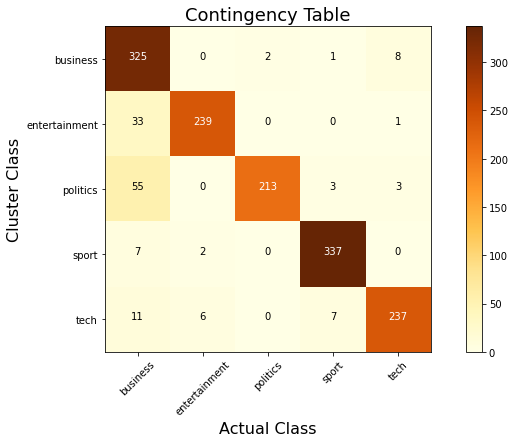

In [30]:
    plot_contingency_table(new_cm)

Text(0, 0.5, 'Total Explained Variance Ratio')

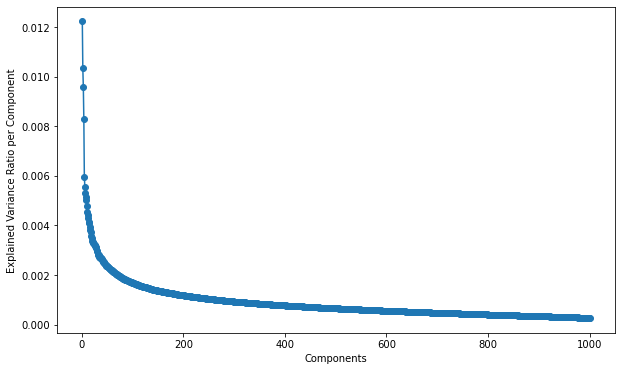

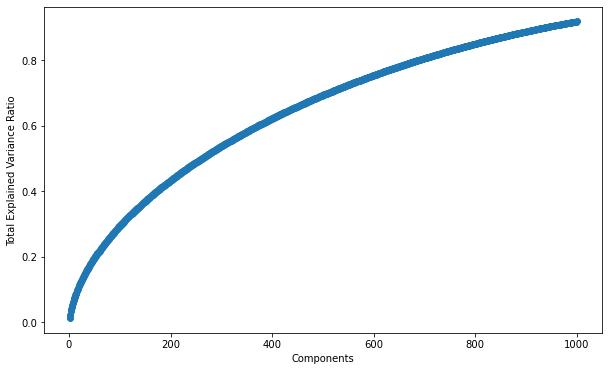

In [31]:
#Question 4
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000,random_state=0)
X_train_svd = svd.fit_transform(X_train_tfidf)
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True),)
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1000)+1,np.cumsum(sorted(svd.explained_variance_ratio_,reverse=True)))
plt.scatter(np.arange(1000)+1,np.cumsum(sorted(svd.explained_variance_ratio_,reverse=True)))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance Ratio")

SVD
[0.09559278234785017, 0.28723037852371924, 0.45454530547541816, 0.6373722928337, 0.6243836738668107, 0.6370864546946138, 0.7324152432666761, 0.5191822082062895, 0.5767382942939482]
[0.10707102503303381, 0.333939594658567, 0.5102280392982543, 0.6904620544756388, 0.7003371148015606, 0.7179911794091373, 0.7742522209871682, 0.6320919694230188, 0.6943217991281154]
[0.10100685785013475, 0.3088288240542173, 0.48077978364826307, 0.6628558504568967, 0.6601829825961139, 0.6751236142928609, 0.7527528698111451, 0.5701003476865457, 0.6300913264331166]
[0.05085558420130519, 0.16871871111583905, 0.36378625750368726, 0.575675249274649, 0.5332063272791544, 0.5417008847821999, 0.6824424977633838, 0.3773115721494809, 0.4731734776422852]
[0.09778280689455386, 0.3063064863126074, 0.4789185771730697, 0.6616705797856419, 0.6589676186120262, 0.6739589218873767, 0.7518941603765591, 0.5685016687163775, 0.6287205752339066]


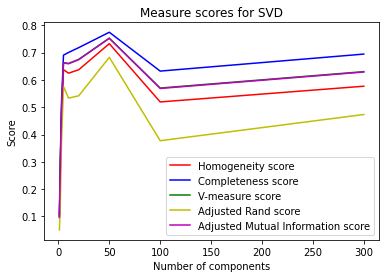

In [32]:
#Question 5

from sklearn.decomposition import NMF

r = [1,2,3,5,10,20,50,100,300]
hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(TruncatedSVD(n_components=i,random_state=0).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")
print("SVD")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)

NMF
[0.09497540626107982, 0.2492543555523731, 0.46872710482011365, 0.6266101482098261, 0.2957177002641152, 0.2477833493320903, 0.1899574549636875, 0.060696061226940885, 0.11516172485031874]
[0.10635795402861557, 0.3104257109126311, 0.4857410213406531, 0.681398854003538, 0.4781164606236942, 0.4745371952687315, 0.505136624746939, 0.2906136292699005, 0.27001226758995706]
[0.10034491927647048, 0.27649711024772844, 0.47708242189539574, 0.6528570310673053, 0.3654206736798626, 0.32556852080490767, 0.27609059103430267, 0.10041910663268752, 0.16145990683016742]
[0.05049522700479038, 0.1286033370800967, 0.329235801335825, 0.5366451011100454, 0.1013140812968505, 0.09876671967958076, 0.0919102940509246, 0.008412517194861975, 0.04879745694126724]
[0.09711880827716882, 0.27376989914965383, 0.47528415988168504, 0.6516340679703055, 0.3627553320128507, 0.32253538544322713, 0.27221496632137376, 0.09509836432196879, 0.1573669215594507]


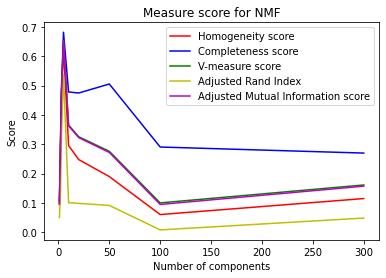

In [33]:

hom_score_nmf = []; complt_score_nmf = []; v_score_nmf = []; adj_rand_score_nmf = []; adj_mut_inf_score_nmf = []
for i in r:
    y_pred_nmf = km.fit_predict(NMF(n_components=i,init='random',random_state=0,max_iter=1000).fit_transform(X_train_tfidf))
    hom_score_nmf.append(homogeneity_score(y_true,y_pred_nmf))
    complt_score_nmf.append(completeness_score(y_true,y_pred_nmf))
    v_score_nmf.append(v_measure_score(y_true,y_pred_nmf))
    adj_rand_score_nmf.append(adjusted_rand_score(y_true,y_pred_nmf))
    adj_mut_inf_score_nmf.append(adjusted_mutual_info_score(y_true,y_pred_nmf))

fig, ax = plt.subplots()
ax.plot(r, hom_score_nmf, 'r', label='Homogeneity score')
ax.plot(r, complt_score_nmf, 'b', label='Completeness score')
ax.plot(r, v_score_nmf, 'g', label='V-measure score')
ax.plot(r, adj_rand_score_nmf,'y',label='Adjusted Rand Index')
ax.plot(r, adj_mut_inf_score_nmf,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure score for NMF")
print("NMF")
print(hom_score_nmf)
print(complt_score_nmf)
print(v_score_nmf)
print(adj_rand_score_nmf)
print(adj_mut_inf_score_nmf)

### SVD best r = 50
### NMF best r = 5

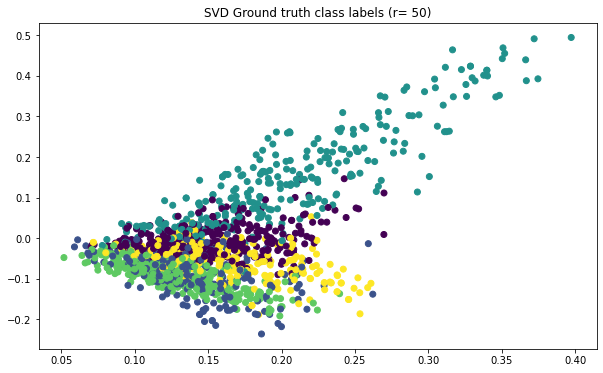

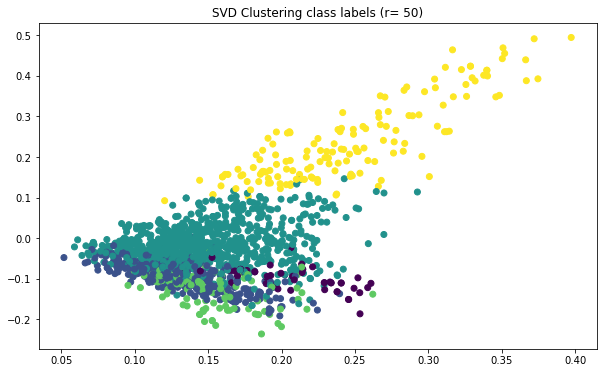

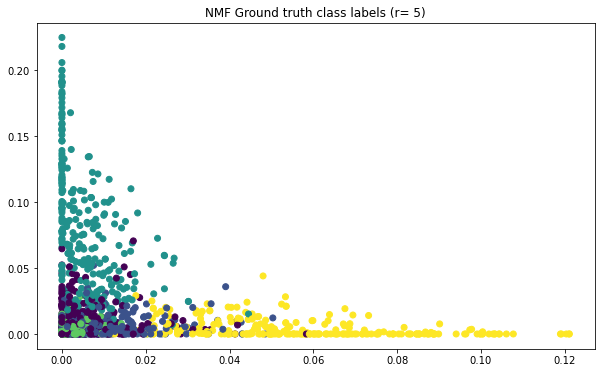

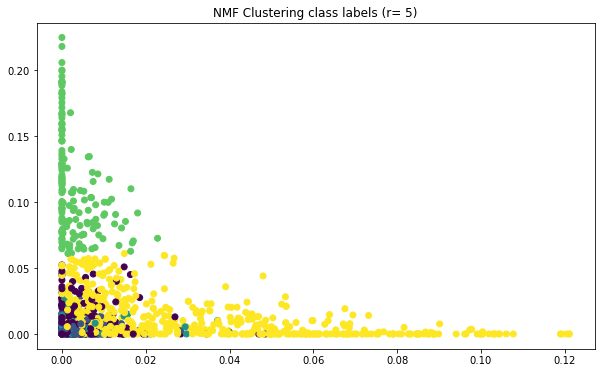

In [34]:
#Question 7


r_best_svd = 50
r_best_nmf = 5

reduced_data_svd = TruncatedSVD(n_components=r_best_svd,random_state=0).fit_transform(X_train_tfidf)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=y_true,cmap='viridis')
plt.title("SVD Ground truth class labels (r= %i)" %r_best_svd);

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30)
svd_labels = km.fit_predict(reduced_data_svd)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=svd_labels,cmap='viridis')
plt.title("SVD Clustering class labels (r= %i)" %r_best_svd);

reduced_data_nmf = NMF(n_components=r_best_nmf,init='random',random_state=0).fit_transform(X_train_tfidf)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=y_true,cmap='viridis')
plt.title("NMF Ground truth class labels (r= %i)" %r_best_nmf);

nmf_labels = km.fit_predict(reduced_data_nmf)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=nmf_labels,cmap='viridis')
plt.title("NMF Clustering class labels (r= %i)" %r_best_nmf);

In [35]:
# Question 10
import time
def nmf_dimension_reduction(training_data, n_components=None, solver='cd', beta_loss='frobenius', max_iter=1000, random_state=0):
    start = time.time()
    nmf = NMF(n_components=n_components, solver=solver, init='nndsvda', beta_loss=beta_loss, max_iter=max_iter, random_state=random_state)
    nmf_dataset = nmf.fit_transform(training_data)
    print("NMF complete after %f seconds" % (time.time()-start))
    return nmf_dataset, nmf

n_components: 1
NMF complete after 0.439963 seconds
array([[ 58, 117,  13,  53,  95],
       [ 32,  96,  17,  49,  79],
       [ 91,  46,  19,  32,  86],
       [ 44, 117,  17,  97,  71],
       [ 69,  60,  35,  19,  78]])


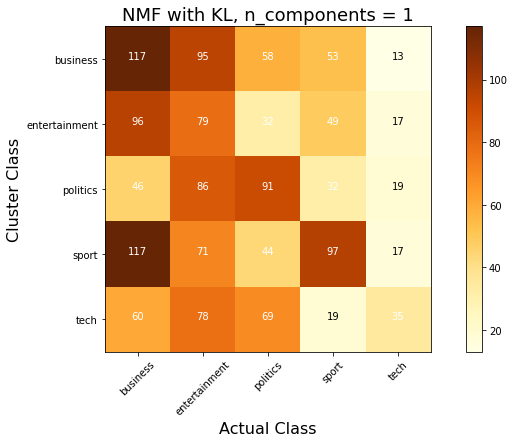

Homogeneity score (n_components = 1):  0.03168536811809713
Completeness score (n_components = 1):  0.033477098295359276
V-measure score (n_components = 1):  0.03255660018403272
Adjusted Rand score (n_components = 1):  0.02148364701775905
Adjusted mutual information score: (n_components = 1):  0.029195734328123547 

n_components: 2
NMF complete after 3.239974 seconds
array([[155,  11,  59, 110,   1],
       [  0, 180,   0,  26,  67],
       [ 89,   1, 175,   9,   0],
       [  0, 253,   0,   6,  87],
       [  3, 128,   6,  41,  83]])


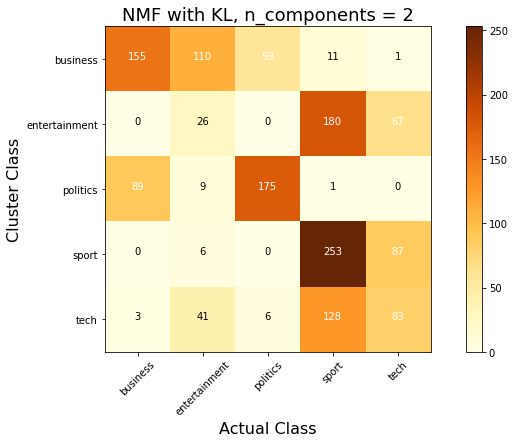

Homogeneity score (n_components = 2):  0.378571742247303
Completeness score (n_components = 2):  0.40000435084555974
V-measure score (n_components = 2):  0.3889930485909321
Adjusted Rand score (n_components = 2):  0.26504726600891254
Adjusted mutual information score: (n_components = 2):  0.3868719399646602 

n_components: 3
NMF complete after 2.096002 seconds
array([[  6,   4, 257,   0,  69],
       [  0, 147,  10, 101,  15],
       [245,   3,   1,   0,  25],
       [  0, 182,   0, 163,   1],
       [  4,   9, 236,   2,  10]])


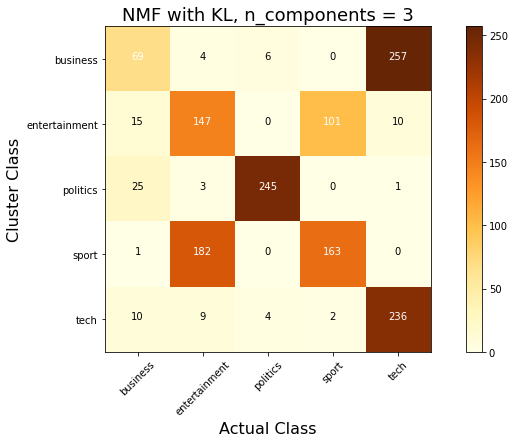

Homogeneity score (n_components = 3):  0.5481554652248133
Completeness score (n_components = 3):  0.5786417696091092
V-measure score (n_components = 3):  0.562986203041828
Adjusted Rand score (n_components = 3):  0.45348658333566183
Adjusted mutual information score: (n_components = 3):  0.5614691714932143 

n_components: 5
NMF complete after 2.135971 seconds
array([[  1,   0,  10, 312,  13],
       [264,   0,   6,   0,   3],
       [  3,   4,   1,   6, 260],
       [  0, 345,   0,   1,   0],
       [  8,   0, 245,   3,   5]])


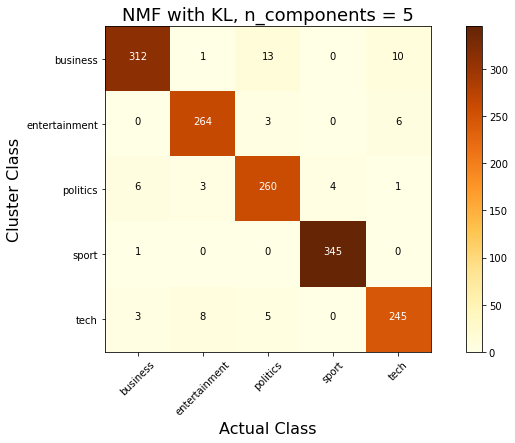

Homogeneity score (n_components = 5):  0.871888626702691
Completeness score (n_components = 5):  0.8712319405329431
V-measure score (n_components = 5):  0.8715601599210592
Adjusted Rand score (n_components = 5):  0.900380807589122
Adjusted mutual information score: (n_components = 5):  0.8711267056727562 

n_components: 10
NMF complete after 4.712384 seconds
array([[  7,   0, 324,   0,   5],
       [  0,   0, 111, 160,   2],
       [214,   0,  59,   0,   1],
       [  0, 124, 222,   0,   0],
       [  2,   0, 109,   1, 149]])


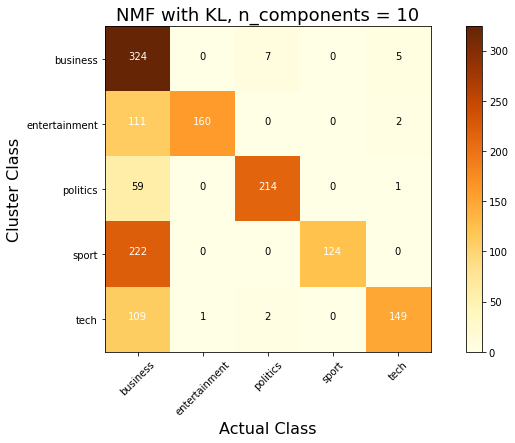

Homogeneity score (n_components = 10):  0.46368275388370295
Completeness score (n_components = 10):  0.5732956130830567
V-measure score (n_components = 10):  0.5126959194748923
Adjusted Rand score (n_components = 10):  0.27918237809080587
Adjusted mutual information score: (n_components = 10):  0.5108716720498964 

n_components: 20
NMF complete after 8.560000 seconds
array([[330,   0,   0,   6,   0],
       [182,   0,   0,   0,  91],
       [195,   0,  78,   0,   1],
       [261,  85,   0,   0,   0],
       [194,   0,   0,  65,   2]])


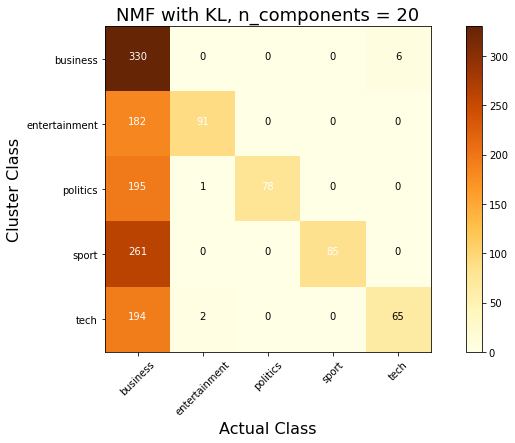

Homogeneity score (n_components = 20):  0.21524774135324923
Completeness score (n_components = 20):  0.4150284049551463
V-measure score (n_components = 20):  0.28347551239968904
Adjusted Rand score (n_components = 20):  0.05016340642255726
Adjusted mutual information score: (n_components = 20):  0.28025734016782 

n_components: 50
NMF complete after 22.625783 seconds
array([[  0, 335,   1,   0,   0],
       [  0, 212,   8,  53,   0],
       [ 50, 203,  21,   0,   0],
       [  0, 286,   0,   0,  60],
       [  0, 259,   2,   0,   0]])


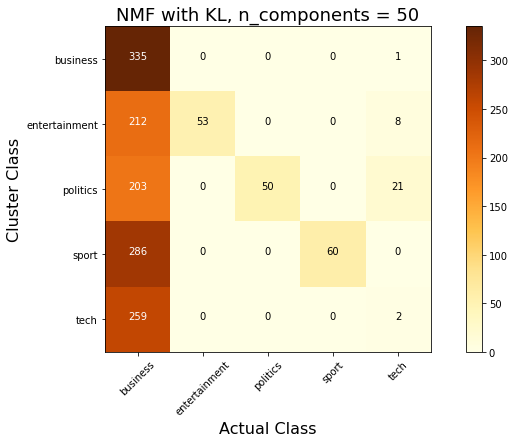

Homogeneity score (n_components = 50):  0.12442396985292864
Completeness score (n_components = 50):  0.3520553812808962
V-measure score (n_components = 50):  0.18386579835126002
Adjusted Rand score (n_components = 50):  0.019549412693309093
Adjusted mutual information score: (n_components = 50):  0.17970248202244962 

n_components: 100
NMF complete after 48.451846 seconds
array([[  1, 328,   0,   0,   7],
       [  0, 218,   0,   0,  55],
       [  0, 240,   0,  31,   3],
       [  0, 344,   0,   0,   2],
       [ 17, 231,  11,   0,   2]])


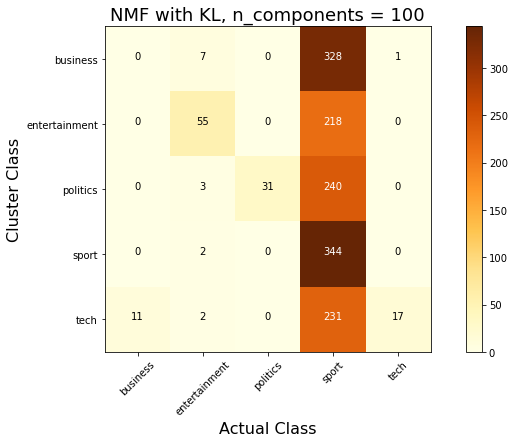

Homogeneity score (n_components = 100):  0.06968886571151195
Completeness score (n_components = 100):  0.2825992128168853
V-measure score (n_components = 100):  0.1118063300605695
Adjusted Rand score (n_components = 100):  0.015037820272490933
Adjusted mutual information score: (n_components = 100):  0.10664697905164164 

n_components: 300
NMF complete after 118.695419 seconds
array([[  0,   0,   0,   0, 336],
       [  0,   1,   0,   0, 272],
       [  0,   0,   0,   0, 274],
       [  0,   0,   9,   0, 337],
       [ 11,   5,   0,   6, 239]])


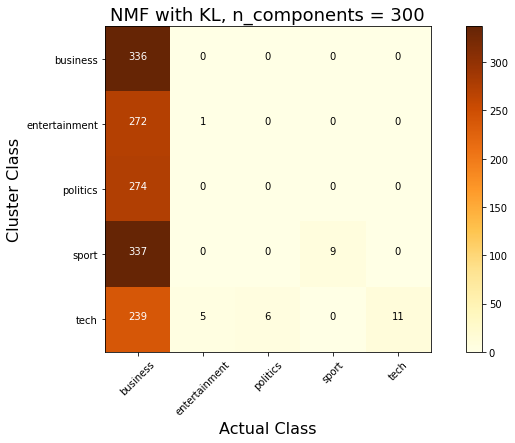

Homogeneity score (n_components = 300):  0.021438748699787964
Completeness score (n_components = 300):  0.2587685433538599
V-measure score (n_components = 300):  0.03959692648763362
Adjusted Rand score (n_components = 300):  0.0018692542607709579
Adjusted mutual information score: (n_components = 300):  0.03243084535179408 



In [67]:
h_scores=[]
c_scores=[]
vm_scores=[]
ar_scores=[]
ami_scores=[]

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print('n_components:',r)
    nmf_dataset, nmf = nmf_dimension_reduction(X_train_tfidf, n_components = r, solver='mu', beta_loss='kullback-leibler', max_iter=1000, random_state=0)
    km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
    cat_index_a=np.array(cat_index)
    y_true = cat_index_a
    y_pred = km.fit_predict(nmf_dataset)
    con_mat = contingency_matrix(y_true,y_pred)
    pp.pprint(con_mat)
    
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    new_cm = cm[rows[:,np.newaxis], cols]
    plot_contingency_table(new_cm, title= 'NMF with KL, n_components = %i' %r)
    print("Homogeneity score (n_components = %i): " %r, homogeneity_score(y_true,y_pred))
    print("Completeness score (n_components = %i): " %r, completeness_score(y_true,y_pred))
    print("V-measure score (n_components = %i): " %r, v_measure_score(y_true,y_pred))
    print("Adjusted Rand score (n_components = %i): " %r, adjusted_rand_score(y_true,y_pred))
    print("Adjusted mutual information score: (n_components = %i): " %r, adjusted_mutual_info_score(y_true,y_pred), "\n")
    h_scores.append(homogeneity_score(y_true,y_pred))
    c_scores.append(completeness_score(y_true,y_pred))
    vm_scores.append(v_measure_score(y_true,y_pred))
    ar_scores.append(adjusted_rand_score(y_true,y_pred))
    ami_scores.append(adjusted_mutual_info_score(y_true,y_pred))
    

In [38]:
def plot_histogram(title_name, ydata, x_labels = ['1', '2', '3', '5', '10', '20', '50', '100', '300'], 
                   height=range(1,10),xtickangle=0):
    plt.gcf().clear()
    fig, ax = plt.subplots()
    ax.set_xticks([i+0.25 for i in height])
    ax.set_xticklabels(x_labels, fontsize = 12)
    
    rects = plt.bar([i for i in height], ydata, 0.5, align='edge', alpha = 0.8)
    plt.xlabel('Number of Principal Components r', fontsize = 14)
    plt.ylabel('Measure Score', fontsize = 14)
    plt.title(title_name, fontsize = 18)
    plt.axis([0.5,len(x_labels)+1,0,1])
    
    plt.xticks(rotation=xtickangle)
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%.3f' % float(height), ha='center', va='bottom')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

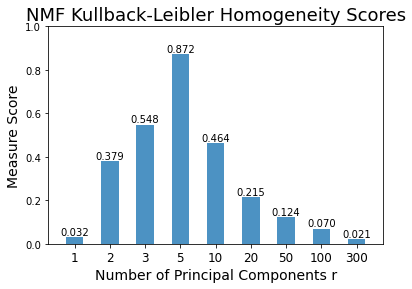

<Figure size 432x288 with 0 Axes>

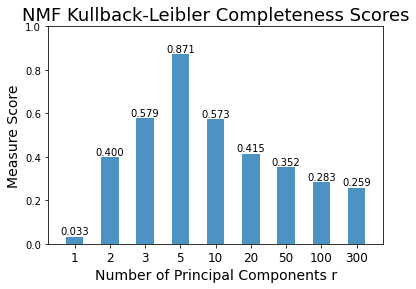

<Figure size 432x288 with 0 Axes>

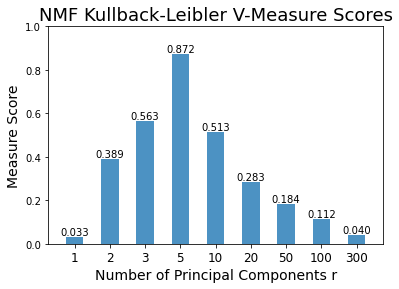

<Figure size 432x288 with 0 Axes>

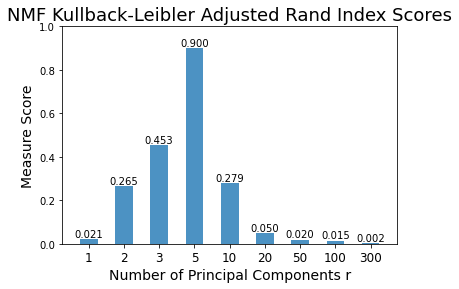

<Figure size 432x288 with 0 Axes>

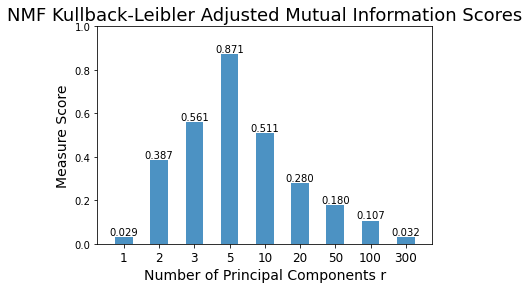

In [39]:
plot_histogram('NMF Kullback-Leibler Homogeneity Scores', h_scores)
plot_histogram('NMF Kullback-Leibler Completeness Scores', c_scores)
plot_histogram('NMF Kullback-Leibler V-Measure Scores', vm_scores)
plot_histogram('NMF Kullback-Leibler Adjusted Rand Index Scores', ar_scores)
plot_histogram('NMF Kullback-Leibler Adjusted Mutual Information Scores', ami_scores)

## NMF Kullback-Leibler with 5 n_components is the BEST PERFORMER by far

In [40]:
from umap import UMAP
def umap_dimension_reduction(training_data, n_components=5, metric='cosine', disconnection_distance=None, random_state=0):
    start = time.time()
    umap = UMAP(n_components=n_components, metric=metric, disconnection_distance=disconnection_distance, random_state=random_state)
    umap_dataset = umap.fit_transform(training_data)
    print("UMAP complete after %f seconds" % (time.time()-start))
    return umap_dataset, umap

n_components: 1
UMAP complete after 6.552539 seconds
array([[ 11,  45,   6, 270,   4],
       [  6,   8,  10,   3, 246],
       [  7, 241,   4,   4,  18],
       [339,   1,   0,   5,   1],
       [  0,   6, 246,   4,   5]])


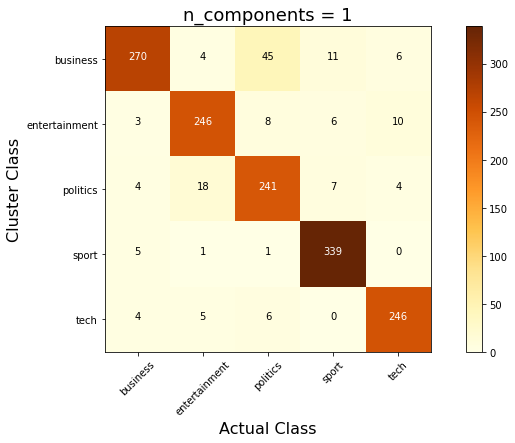

Homogeneity score (n_components = 1):  0.7468271885940921
Completeness score (n_components = 1):  0.7465736923330151
V-measure score (n_components = 1):  0.7467004189487833
Adjusted Rand score (n_components = 1):  0.7756105266219085
Adjusted mutual information score: (n_components = 1):  0.7458454119495154 

n_components: 2
UMAP complete after 2.789000 seconds
array([[ 25,   2, 291,  10,   8],
       [  8, 250,   3,   1,  11],
       [251,   3,  13,   3,   4],
       [  2,   0,   2, 342,   0],
       [ 11,   6,   3,   0, 241]])


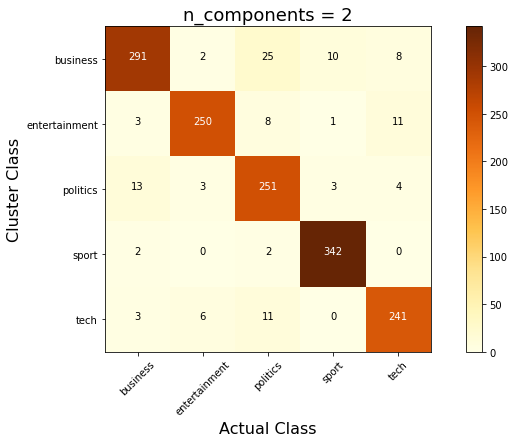

Homogeneity score (n_components = 2):  0.7877844882912928
Completeness score (n_components = 2):  0.7876463548149023
V-measure score (n_components = 2):  0.7877154154973391
Adjusted Rand score (n_components = 2):  0.8222488127991642
Adjusted mutual information score: (n_components = 2):  0.786998791268648 

n_components: 3
UMAP complete after 3.144999 seconds
array([[ 23,   2,   7,   8, 296],
       [  8, 240,   1,  21,   3],
       [245,   3,   3,   6,  17],
       [  2,   0, 342,   0,   2],
       [ 11,   4,   0, 240,   6]])


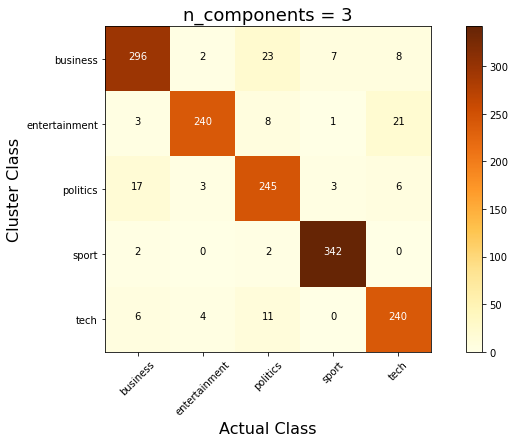

Homogeneity score (n_components = 3):  0.7726015436744645
Completeness score (n_components = 3):  0.7728408693424522
V-measure score (n_components = 3):  0.7727211879775916
Adjusted Rand score (n_components = 3):  0.8072223001840085
Adjusted mutual information score: (n_components = 3):  0.7719537535172503 

n_components: 5
UMAP complete after 3.442998 seconds
array([[297,   2,   7,  22,   8],
       [  3, 238,   1,   9,  22],
       [ 18,   3,   3, 244,   6],
       [  3,   0, 342,   1,   0],
       [  6,   3,   0,  10, 242]])


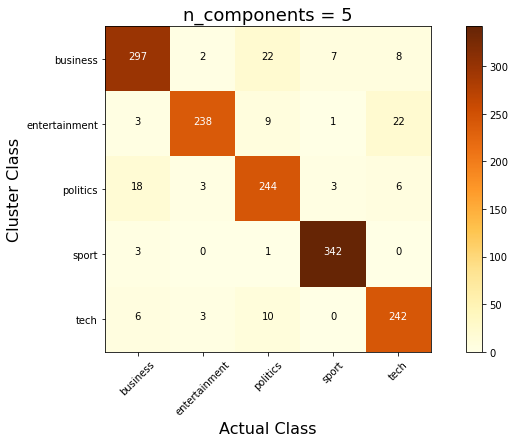

Homogeneity score (n_components = 5):  0.7731810676596066
Completeness score (n_components = 5):  0.7736490277115242
V-measure score (n_components = 5):  0.7734149768999596
Adjusted Rand score (n_components = 5):  0.8071052680894192
Adjusted mutual information score: (n_components = 5):  0.7726497681641754 

n_components: 10
UMAP complete after 3.959981 seconds
array([[  7, 298,   2,  21,   8],
       [  1,   3, 242,   9,  18],
       [  3,  21,   3, 241,   6],
       [342,   3,   0,   1,   0],
       [  0,  12,   4,   5, 240]])


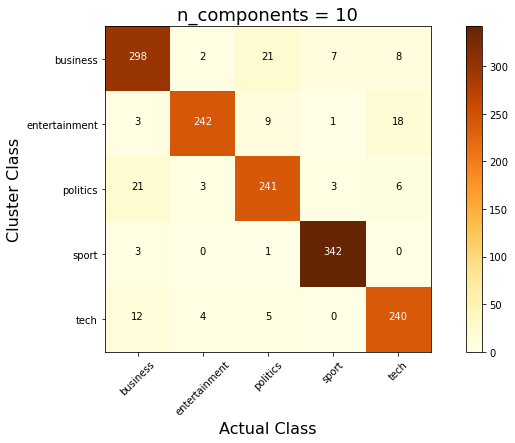

Homogeneity score (n_components = 10):  0.7720132132901223
Completeness score (n_components = 10):  0.7728583809945228
V-measure score (n_components = 10):  0.7724355659553257
Adjusted Rand score (n_components = 10):  0.8063089768727172
Adjusted mutual information score: (n_components = 10):  0.7716668568089278 

n_components: 20
UMAP complete after 4.219583 seconds
array([[298,   7,   8,   2,  21],
       [  3,   1,  24, 239,   6],
       [ 20,   3,   6,   3, 242],
       [  3, 342,   0,   0,   1],
       [  7,   0, 242,   3,   9]])


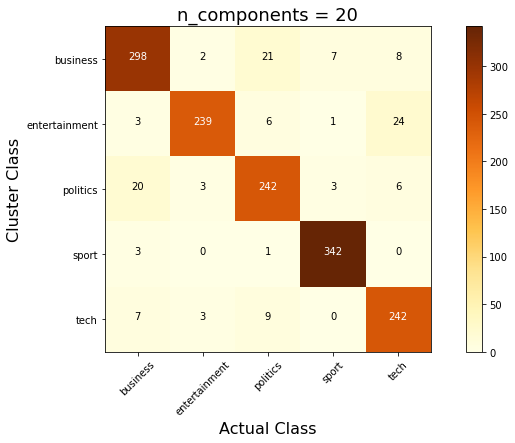

Homogeneity score (n_components = 20):  0.7741951094753449
Completeness score (n_components = 20):  0.7748092891011233
V-measure score (n_components = 20):  0.7745020775272459
Adjusted Rand score (n_components = 20):  0.8072375999556903
Adjusted mutual information score: (n_components = 20):  0.7737404665701075 

n_components: 50
UMAP complete after 4.602051 seconds
array([[  8,   7,   2, 302,  17],
       [ 20,   1, 237,   8,   7],
       [  6,   3,   3,  28, 234],
       [  0, 342,   0,   3,   1],
       [244,   0,   3,  10,   4]])


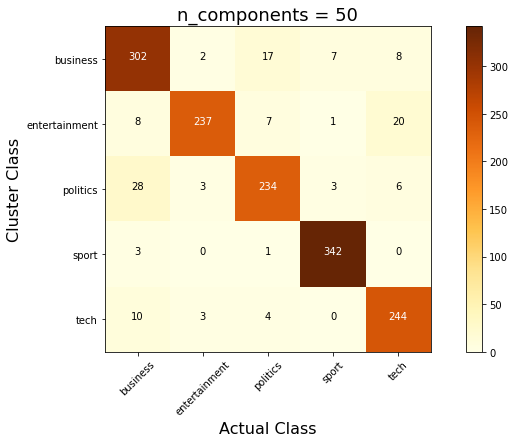

Homogeneity score (n_components = 50):  0.7670716142140709
Completeness score (n_components = 50):  0.7692052467890498
V-measure score (n_components = 50):  0.7681369488714972
Adjusted Rand score (n_components = 50):  0.8001460009612221
Adjusted mutual information score: (n_components = 50):  0.7673530388271971 

n_components: 100
UMAP complete after 6.416652 seconds
array([[  8,   8, 295,   2,  23],
       [ 22,   1,   3, 239,   8],
       [  6,   3,  18,   3, 244],
       [  0, 342,   3,   0,   1],
       [242,   0,   6,   3,  10]])


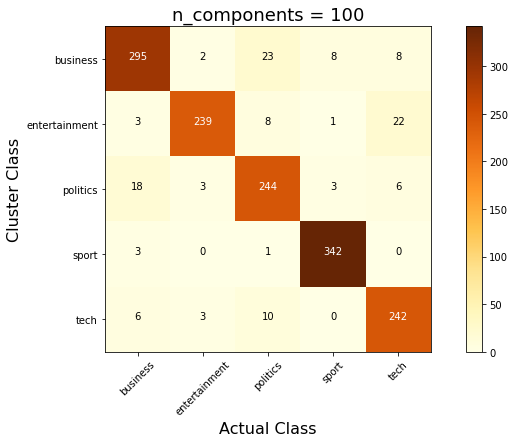

Homogeneity score (n_components = 100):  0.7720419726785506
Completeness score (n_components = 100):  0.7724449695130641
V-measure score (n_components = 100):  0.7722434185196269
Adjusted Rand score (n_components = 100):  0.8053802812833396
Adjusted mutual information score: (n_components = 100):  0.7714742865203635 

n_components: 300
UMAP complete after 11.380999 seconds
array([[  8,   7,  22,   2, 297],
       [ 23,   1,  10, 236,   3],
       [  6,   3, 244,   3,  18],
       [  0, 342,   1,   0,   3],
       [241,   0,   5,   3,  12]])


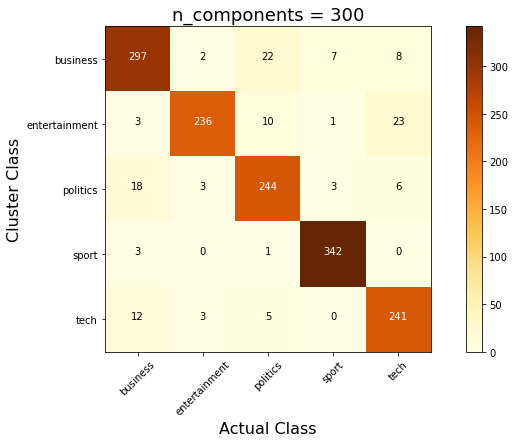

Homogeneity score (n_components = 300):  0.7693424060680785
Completeness score (n_components = 300):  0.7701941161622885
V-measure score (n_components = 300):  0.7697680255215246
Adjusted Rand score (n_components = 300):  0.8025100243823309
Adjusted mutual information score: (n_components = 300):  0.7689902992852455 



In [41]:
# Question 11 - Euclidean UMAP
umap_euc_hscores = []
umap_euc_cscores = []
umap_euc_vmscores = []
umap_euc_arscores = []
umap_euc_amiscores = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print('n_components:',r)
    umap_dataset, umap = umap_dimension_reduction(X_train_tfidf, n_components = r, metric='euclidean', random_state=0)
    km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
    cat_index_a=np.array(cat_index)
    y_true = cat_index_a
    y_pred = km.fit_predict(umap_dataset)
    con_mat = contingency_matrix(y_true,y_pred)
    pp.pprint(con_mat)
    
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    new_cm = cm[rows[:,np.newaxis], cols]
    plot_contingency_table(new_cm, title= 'n_components = %i' %r)
    print("Homogeneity score (n_components = %i): " %r, homogeneity_score(y_true,y_pred))
    print("Completeness score (n_components = %i): " %r, completeness_score(y_true,y_pred))
    print("V-measure score (n_components = %i): " %r, v_measure_score(y_true,y_pred))
    print("Adjusted Rand score (n_components = %i): " %r, adjusted_rand_score(y_true,y_pred))
    print("Adjusted mutual information score: (n_components = %i): " %r, adjusted_mutual_info_score(y_true,y_pred), "\n")
    umap_euc_hscores.append(homogeneity_score(y_true,y_pred))
    umap_euc_cscores.append(completeness_score(y_true,y_pred))
    umap_euc_vmscores.append(v_measure_score(y_true,y_pred))
    umap_euc_arscores.append(adjusted_rand_score(y_true,y_pred))
    umap_euc_amiscores.append(adjusted_mutual_info_score(y_true,y_pred))

<Figure size 432x288 with 0 Axes>

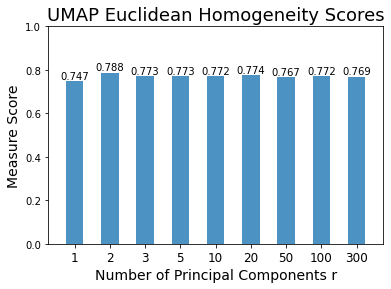

<Figure size 432x288 with 0 Axes>

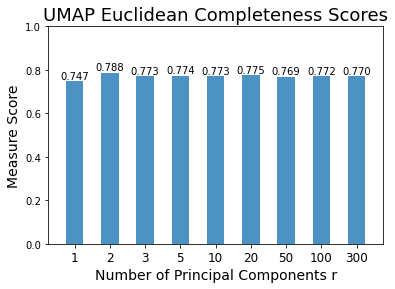

<Figure size 432x288 with 0 Axes>

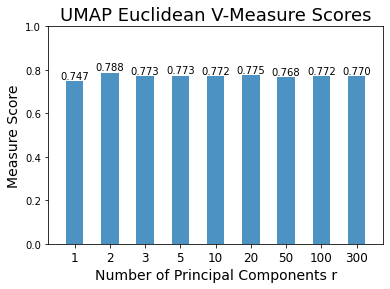

<Figure size 432x288 with 0 Axes>

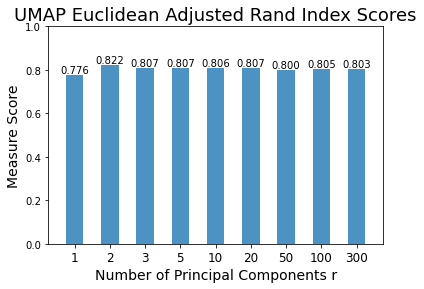

<Figure size 432x288 with 0 Axes>

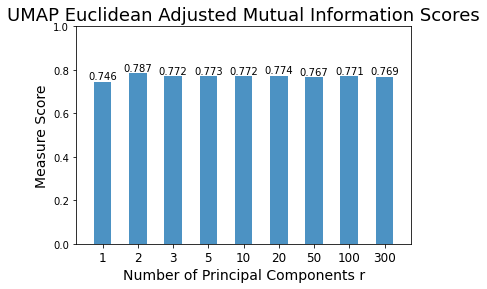

In [224]:
plot_histogram('UMAP Euclidean Homogeneity Scores', umap_euc_hscores)
plot_histogram('UMAP Euclidean Completeness Scores', umap_euc_cscores)
plot_histogram('UMAP Euclidean V-Measure Scores', umap_euc_vmscores)
plot_histogram('UMAP Euclidean Adjusted Rand Index Scores', umap_euc_arscores)
plot_histogram('UMAP Euclidean Adjusted Mutual Information Scores', umap_euc_amiscores)

### UMAP Euclidean best n_component = 2

n_components: 1
UMAP complete after 6.395168 seconds
array([[  3,   7, 297,  28,   1],
       [  5, 244,  19,   4,   1],
       [  3,  11,  14, 242,   4],
       [125,   0,   3,   0, 218],
       [  0, 167,   4,  90,   0]])


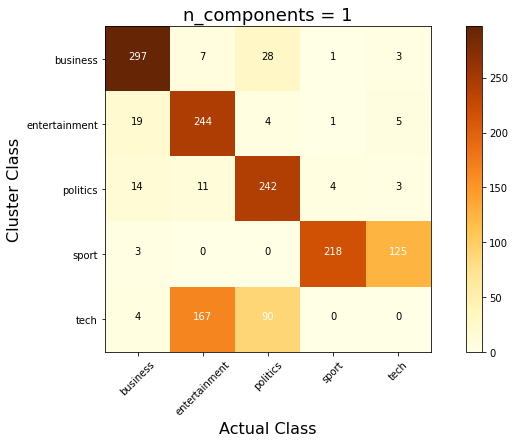

Homogeneity score (n_components = 1):  0.6104241950450419
Completeness score (n_components = 1):  0.6341937546868885
V-measure score (n_components = 1):  0.6220820008111202
Adjusted Rand score (n_components = 1):  0.5502943852666947
Adjusted mutual information score: (n_components = 1):  0.6207806758792377 

n_components: 2
UMAP complete after 6.302183 seconds
array([[300,   2,   3,  11,  20],
       [  3,   1, 249,  15,   5],
       [ 15,   4,   6,   7, 242],
       [  4, 341,   1,   0,   0],
       [  4,   0,   5, 242,  10]])


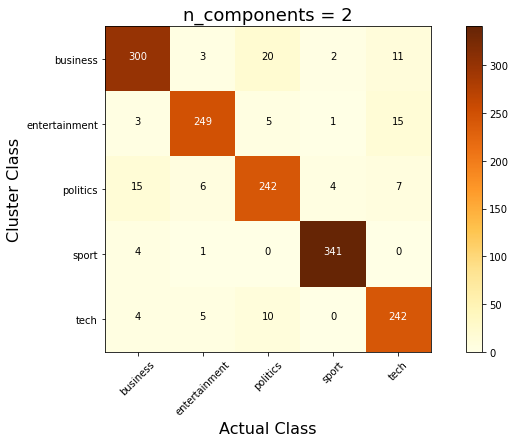

Homogeneity score (n_components = 2):  0.7856947329007031
Completeness score (n_components = 2):  0.7851917625682422
V-measure score (n_components = 2):  0.7854431672133287
Adjusted Rand score (n_components = 2):  0.8233618980477416
Adjusted mutual information score: (n_components = 2):  0.7847190461689071 

n_components: 3
UMAP complete after 7.777386 seconds
array([[ 11,   7, 295,  21,   2],
       [ 17,   1,   3,   8, 244],
       [  6,   3,  19, 243,   3],
       [  0, 342,   3,   1,   0],
       [242,   0,   5,  10,   4]])


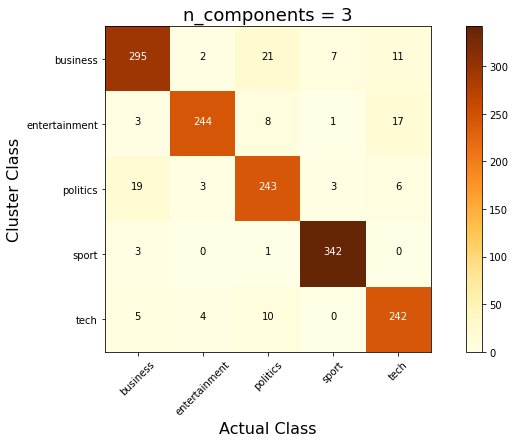

Homogeneity score (n_components = 3):  0.7758322744467692
Completeness score (n_components = 3):  0.7759317739983306
V-measure score (n_components = 3):  0.7758820210325801
Adjusted Rand score (n_components = 3):  0.8108279245474898
Adjusted mutual information score: (n_components = 3):  0.7751253309742013 

n_components: 5
UMAP complete after 9.152273 seconds
array([[  2, 297,   7,  21,   9],
       [237,   3,   4,   8,  21],
       [  3,  17,   3, 245,   6],
       [  0,   3, 342,   1,   0],
       [  4,   6,   0,  10, 241]])


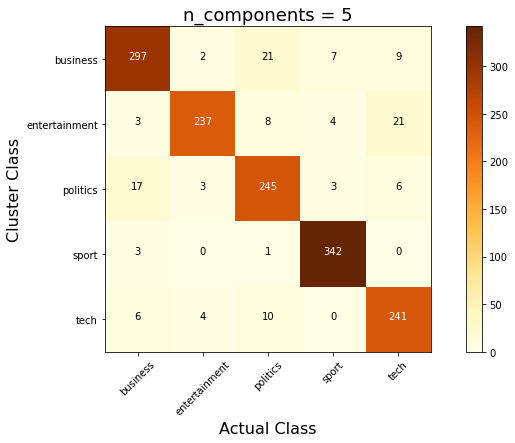

Homogeneity score (n_components = 5):  0.7684880889199883
Completeness score (n_components = 5):  0.7691284354467205
V-measure score (n_components = 5):  0.7688081288459234
Adjusted Rand score (n_components = 5):  0.805090610380119
Adjusted mutual information score: (n_components = 5):  0.7680272707141212 

n_components: 10
UMAP complete after 9.244360 seconds
array([[  8,  22, 297,   7,   2],
       [ 27,   8,   4,   1, 233],
       [  6, 241,  21,   3,   3],
       [  0,   1,   3, 342,   0],
       [243,  11,   4,   0,   3]])


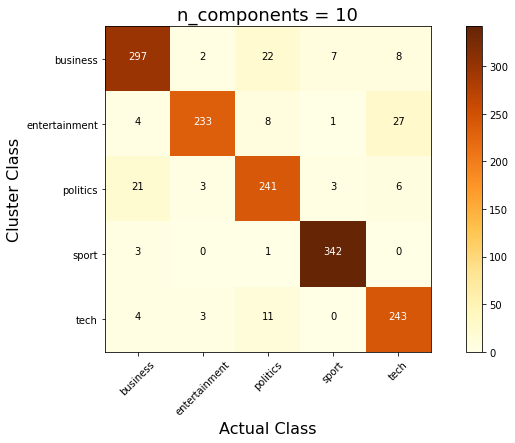

Homogeneity score (n_components = 10):  0.7664251430985172
Completeness score (n_components = 10):  0.7672067954436976
V-measure score (n_components = 10):  0.7668157700771635
Adjusted Rand score (n_components = 10):  0.7981445497761518
Adjusted mutual information score: (n_components = 10):  0.7660281056768535 

n_components: 20
UMAP complete after 10.378306 seconds
array([[ 10,   7, 296,  21,   2],
       [ 25,   1,   3,   6, 238],
       [ 11,   3,  19, 238,   3],
       [  0, 342,   3,   1,   0],
       [242,   0,   6,   9,   4]])


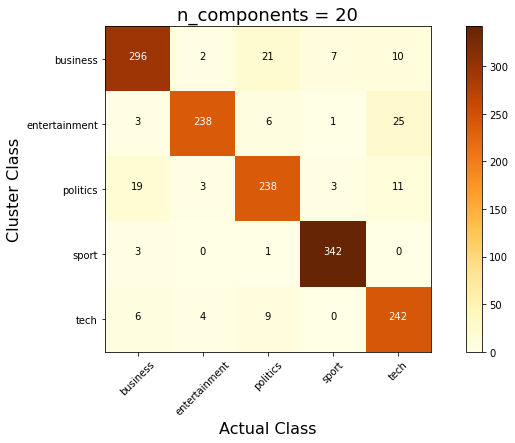

Homogeneity score (n_components = 20):  0.7642804371400156
Completeness score (n_components = 20):  0.7647300957999741
V-measure score (n_components = 20):  0.7645052003511205
Adjusted Rand score (n_components = 20):  0.7979557257462918
Adjusted mutual information score: (n_components = 20):  0.7637099091308395 

n_components: 50
UMAP complete after 11.417746 seconds
array([[ 11,   8,  21,   2, 294],
       [ 25,   1,   8, 236,   3],
       [  6,   3, 247,   3,  15],
       [  0, 342,   1,   0,   3],
       [242,   0,  10,   3,   6]])


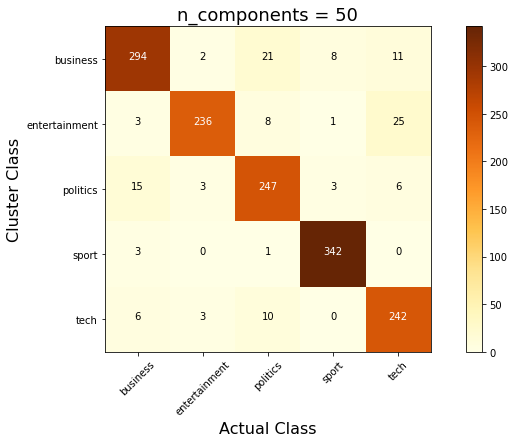

Homogeneity score (n_components = 50):  0.7704377443662771
Completeness score (n_components = 50):  0.7707970400691387
V-measure score (n_components = 50):  0.7706173503378453
Adjusted Rand score (n_components = 50):  0.8040389355000442
Adjusted mutual information score: (n_components = 50):  0.7698427487205289 

n_components: 100
UMAP complete after 15.145755 seconds
array([[296,   2,   7,  11,  20],
       [  3, 234,   1,  29,   6],
       [ 20,   3,   3,  10, 238],
       [  3,   0, 343,   0,   0],
       [  6,   3,   0, 243,   9]])


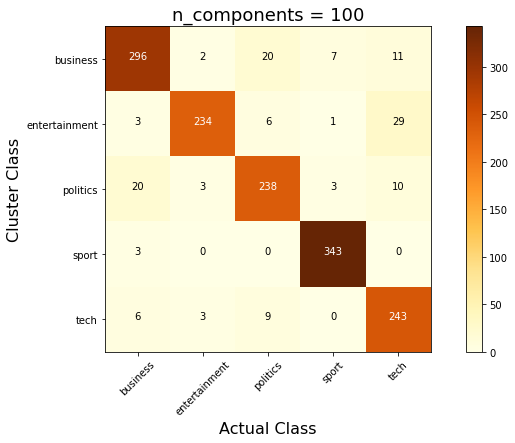

Homogeneity score (n_components = 100):  0.7647232386054287
Completeness score (n_components = 100):  0.7655886753451464
V-measure score (n_components = 100):  0.7651557122602254
Adjusted Rand score (n_components = 100):  0.7956367327650262
Adjusted mutual information score: (n_components = 100):  0.7643623948488353 

n_components: 300
UMAP complete after 28.058502 seconds
array([[ 10,   7,  20, 297,   2],
       [ 27,   1,   7,   3, 235],
       [  6,   3, 245,  17,   3],
       [  0, 342,   1,   3,   0],
       [242,   0,  10,   6,   3]])


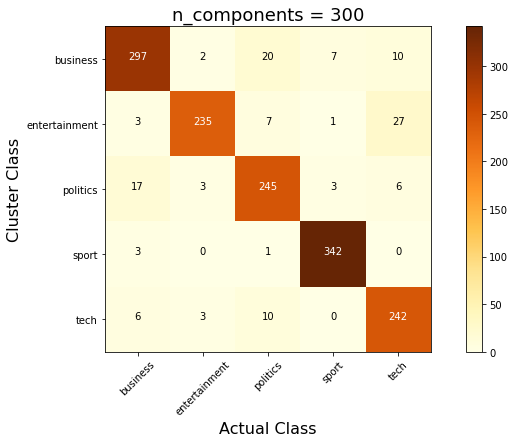

Homogeneity score (n_components = 300):  0.771560130010998
Completeness score (n_components = 300):  0.7721055781137884
V-measure score (n_components = 300):  0.7718327576964407
Adjusted Rand score (n_components = 300):  0.8047317690048078
Adjusted mutual information score: (n_components = 300):  0.7710621646084921 



In [225]:
# Question 11 - cosine UMAP
umap_cos_hscores = []
umap_cos_cscores = []
umap_cos_vmscores = []
umap_cos_arscores = []
umap_cos_amiscores = []

for r in [1, 2, 3, 5, 10, 20, 50, 100, 300]:
    print('n_components:',r)
    umap_dataset, umap = umap_dimension_reduction(X_train_tfidf, n_components = r, metric='cosine', disconnection_distance=2, random_state=0)
    km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=40)
    cat_index_a=np.array(cat_index)
    y_true = cat_index_a
    y_pred = km.fit_predict(umap_dataset)
    con_mat = contingency_matrix(y_true,y_pred)
    pp.pprint(con_mat)
    
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    new_cm = cm[rows[:,np.newaxis], cols]
    plot_contingency_table(new_cm, title= 'n_components = %i' %r)
    print("Homogeneity score (n_components = %i): " %r, homogeneity_score(y_true,y_pred))
    print("Completeness score (n_components = %i): " %r, completeness_score(y_true,y_pred))
    print("V-measure score (n_components = %i): " %r, v_measure_score(y_true,y_pred))
    print("Adjusted Rand score (n_components = %i): " %r, adjusted_rand_score(y_true,y_pred))
    print("Adjusted mutual information score: (n_components = %i): " %r, adjusted_mutual_info_score(y_true,y_pred), "\n")
    umap_cos_hscores.append(homogeneity_score(y_true,y_pred))
    umap_cos_cscores.append(completeness_score(y_true,y_pred))
    umap_cos_vmscores.append(v_measure_score(y_true,y_pred))
    umap_cos_arscores.append(adjusted_rand_score(y_true,y_pred))
    umap_cos_amiscores.append(adjusted_mutual_info_score(y_true,y_pred))

<Figure size 432x288 with 0 Axes>

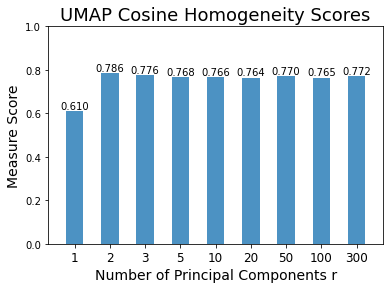

<Figure size 432x288 with 0 Axes>

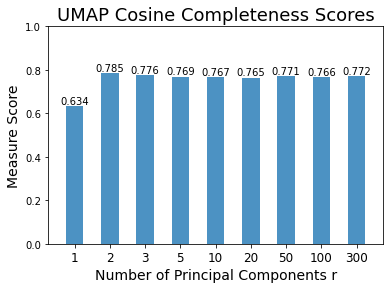

<Figure size 432x288 with 0 Axes>

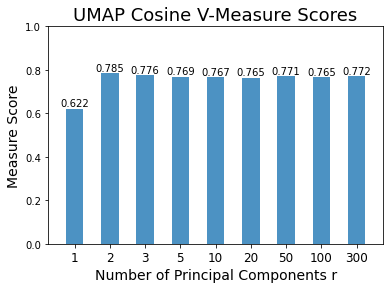

<Figure size 432x288 with 0 Axes>

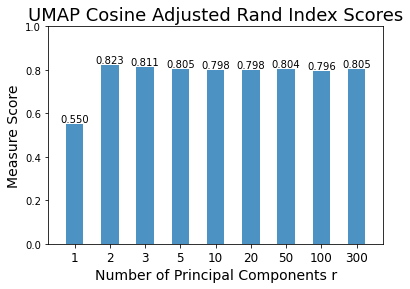

<Figure size 432x288 with 0 Axes>

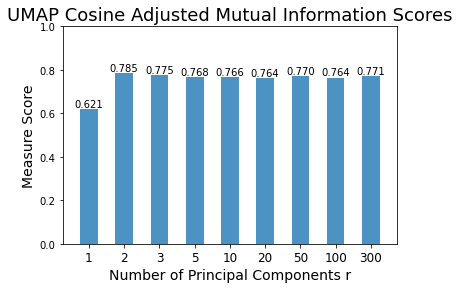

In [227]:
plot_histogram('UMAP Cosine Homogeneity Scores', umap_cos_hscores)
plot_histogram('UMAP Cosine Completeness Scores', umap_cos_cscores)
plot_histogram('UMAP Cosine V-Measure Scores', umap_cos_vmscores)
plot_histogram('UMAP Cosine Adjusted Rand Index Scores', umap_cos_arscores)
plot_histogram('UMAP Cosine Adjusted Mutual Information Scores', umap_cos_amiscores)

### UMAP Cosine Best n_component = 2

UMAP complete after 3.001999 seconds

 -------------------- Linkage: ward --------------------
array([[  2,  11, 309,  11,   3],
       [  1,  15,   4,   3, 250],
       [  4,  12,  42, 210,   6],
       [341,   0,   4,   0,   1],
       [  0, 249,   4,   3,   5]])


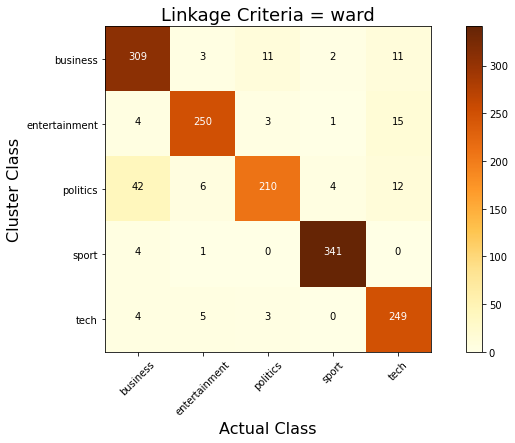

Homogeneity score:  0.773498782485866
Completeness score:  0.7772287680025306
V-measure score:  0.7753592893524148
Adjusted Rand score:  0.8034266517360535
Adjusted mutual information score:  0.7745989979255048

 -------------------- Linkage: single --------------------
array([[334,   1,   0,   0,   1],
       [272,   1,   0,   0,   0],
       [259,   0,  11,   0,   4],
       [  5,  59,   0,  65, 217],
       [261,   0,   0,   0,   0]])


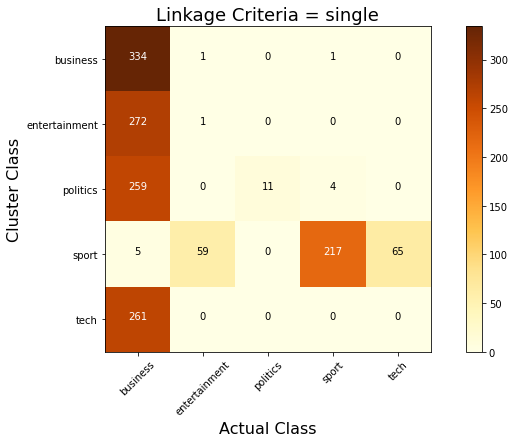

Homogeneity score:  0.3201538561790566
Completeness score:  0.6439941417520066
V-measure score:  0.4276878825264514
Adjusted Rand score:  0.16744189986813957
Adjusted mutual information score:  0.4249881610923232


In [42]:
#Question 13
from sklearn.cluster import AgglomerativeClustering

umap_dataset, umap = umap_dimension_reduction(X_train_tfidf, n_components = 2, metric='cosine', disconnection_distance=2, random_state=0)


for linkage in ('ward', 'single'):
    print('\n','-'*20, "Linkage:", linkage, '-'*20)

    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=5)
   
    cat_index_a=np.array(cat_index)
    y_true = cat_index_a
    y_pred = clustering.fit_predict(umap_dataset)
    con_mat = contingency_matrix(y_true,y_pred)
    pp.pprint(con_mat)
    
    cm = confusion_matrix(y_true, y_pred)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    new_cm = cm[rows[:,np.newaxis], cols]
    plot_contingency_table(new_cm, title= 'Linkage Criteria = %s' %linkage)
    
    print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
    print("Completeness score: ",completeness_score(y_true,y_pred))
    print("V-measure score: ",v_measure_score(y_true,y_pred))
    print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
    print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

### 'Ward' linkage criterial performed significantly better

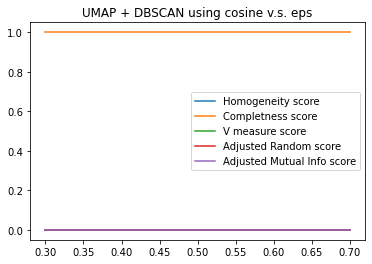

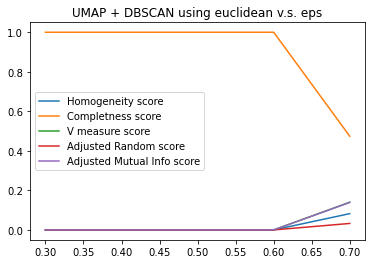

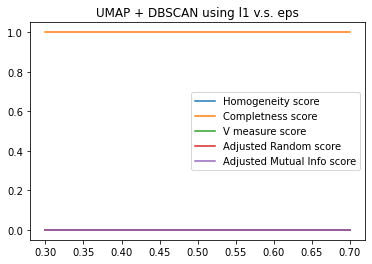

In [44]:
# Question 14
from sklearn.cluster import DBSCAN

umap_homos = []
umap_comp = []
umap_v_measure = []
umap_adj_rand = []
umap_adj_mutual_info = []

epsVals = [x*0.1 for x in range(3, 8)]
metrics = ["cosine", "euclidean", "l1"]

for metric_ in metrics:
    for epsVal in epsVals:
        clustering = DBSCAN(min_samples=100, eps=epsVal, metric=metric_)
        clustering_data = clustering.fit(umap_dataset)
        
        umap_homos.append(homogeneity_score(cat_index_a, clustering_data.labels_))
        umap_comp.append(completeness_score(cat_index_a, clustering_data.labels_))
        umap_v_measure.append(v_measure_score(cat_index_a, clustering_data.labels_))
        umap_adj_rand.append(adjusted_rand_score(cat_index_a, clustering_data.labels_))
        umap_adj_mutual_info.append(adjusted_mutual_info_score(cat_index_a, clustering_data.labels_))

numEpsVals = len(epsVals)
for index, metric_ in enumerate(metrics):
    plt.title('UMAP + DBSCAN using ' + metric_ + " v.s. eps") 
    plt.plot(epsVals, umap_homos[index*numEpsVals:(index+1)*numEpsVals], label='Homogeneity score')
    plt.plot(epsVals, umap_comp[index*numEpsVals:(index+1)*numEpsVals], label='Completness score')
    plt.plot(epsVals, umap_v_measure[index*numEpsVals:(index+1)*numEpsVals], label='V measure score')
    plt.plot(epsVals, umap_adj_rand[index*numEpsVals:(index+1)*numEpsVals], label='Adjusted Random score')
    plt.plot(epsVals, umap_adj_mutual_info[index*numEpsVals:(index+1)*numEpsVals], label='Adjusted Mutual Info score')
    plt.legend(loc='best')
    plt.show()

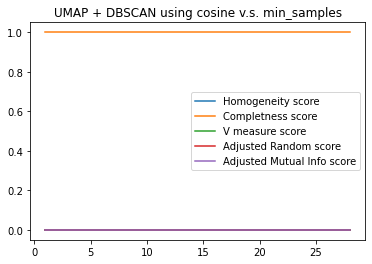

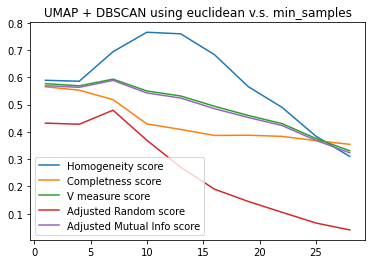

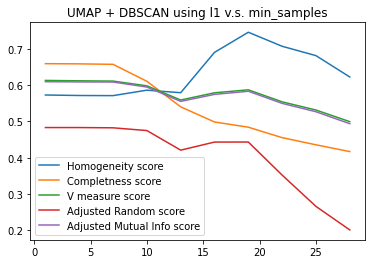

In [45]:

umap_homos = []
umap_comp = []
umap_v_measure = []
umap_adj_rand = []
umap_adj_mutual_info = []

metrics = ["cosine", "euclidean", "l1"]
min_sampleVals = list(range(1, 30, 3))
optimalEpsVal = {"cosine":0.5, "euclidean":0.3, "l1":0.5}

for metric_ in metrics:
    for min_samplesVal in min_sampleVals:
        epsVal = optimalEpsVal[metric_]
        clustering = DBSCAN(min_samples=min_samplesVal, eps=epsVal, metric=metric_)
        clustering_data = clustering.fit(umap_dataset)
        
        umap_homos.append(homogeneity_score(cat_index_a, clustering_data.labels_))
        umap_comp.append(completeness_score(cat_index_a, clustering_data.labels_))
        umap_v_measure.append(v_measure_score(cat_index_a, clustering_data.labels_))
        umap_adj_rand.append(adjusted_rand_score(cat_index_a, clustering_data.labels_))
        umap_adj_mutual_info.append(adjusted_mutual_info_score(cat_index_a, clustering_data.labels_))

interval = len(min_sampleVals)
for index, metric_ in enumerate(metrics):
    plt.title('UMAP + DBSCAN using ' + metric_ + " v.s. min_samples") 
    plt.plot(min_sampleVals, umap_homos[index*interval:(index+1)*interval], label='Homogeneity score')
    plt.plot(min_sampleVals, umap_comp[index*interval:(index+1)*interval], label='Completness score')
    plt.plot(min_sampleVals, umap_v_measure[index*interval:(index+1)*interval], label='V measure score')
    plt.plot(min_sampleVals, umap_adj_rand[index*interval:(index+1)*interval], label='Adjusted Random score')
    plt.plot(min_sampleVals, umap_adj_mutual_info[index*interval:(index+1)*interval], label='Adjusted Mutual Info score')
    plt.legend(loc='best')
    plt.show()

In [46]:

umap_homos = {}
umap_comp = {}
umap_v_measure = {}
umap_adj_rand = {}
umap_adj_mutual_info = {}

epsVals = [x*0.1 for x in range(3, 8)]
# pVals = [None, 1, 0.25] all the same
metrics = ["cosine", "euclidean", "l1"]
min_sampleVals = list(range(1, 100, 5))

for metric_ in metrics:
    for epsVal in epsVals:
        for min_samplesVal in min_sampleVals:
            clustering = DBSCAN(min_samples=min_samplesVal, eps=epsVal, metric=metric_)
            clustering_data = clustering.fit(umap_dataset)
  
            umap_homos[(metric_, epsVal, min_samplesVal)] = homogeneity_score(cat_index_a, clustering_data.labels_)
            umap_comp[(metric_, epsVal, min_samplesVal)] = completeness_score(cat_index_a, clustering_data.labels_)
            umap_v_measure[(metric_, epsVal, min_samplesVal)] = v_measure_score(cat_index_a, clustering_data.labels_)
            umap_adj_rand[(metric_, epsVal, min_samplesVal)] = adjusted_rand_score(cat_index_a, clustering_data.labels_)
            umap_adj_mutual_info[(metric_, epsVal, min_samplesVal)] = adjusted_mutual_info_score(cat_index_a, clustering_data.labels_)

In [47]:
sorted(list(umap_v_measure.items()),key=lambda x: x[1], reverse=True)

[(('euclidean', 0.7000000000000001, 46), 0.6639702617184607),
 (('euclidean', 0.7000000000000001, 51), 0.6535815009402993),
 (('l1', 0.7000000000000001, 21), 0.6526753047877439),
 (('euclidean', 0.7000000000000001, 56), 0.648195270876411),
 (('euclidean', 0.6000000000000001, 36), 0.6479681053305387),
 (('l1', 0.6000000000000001, 16), 0.641884014823684),
 (('euclidean', 0.6000000000000001, 26), 0.637138021706717),
 (('euclidean', 0.6000000000000001, 31), 0.637090225241809),
 (('euclidean', 0.6000000000000001, 41), 0.6263192016822324),
 (('l1', 0.7000000000000001, 26), 0.6222208165602452),
 (('l1', 0.6000000000000001, 11), 0.612795096376907),
 (('l1', 0.5, 1), 0.6127739672712841),
 (('euclidean', 0.5, 11), 0.6123315337219679),
 (('euclidean', 0.4, 1), 0.6121375410966572),
 (('euclidean', 0.5, 1), 0.6121375410966572),
 (('l1', 0.6000000000000001, 1), 0.6121375410966572),
 (('l1', 0.7000000000000001, 36), 0.6120970821971606),
 (('l1', 0.5, 6), 0.6114009546618204),
 (('euclidean', 0.6000000

In [52]:
umap_dataset, umap = umap_dimension_reduction(X_train_tfidf, n_components = 2, metric='euclidean', disconnection_distance=2, random_state=0)

clustering = DBSCAN(min_samples=46, eps=0.7, metric='euclidean')

newCm = []
for index, i in enumerate(cm):
    if i.sum() != 0:
        newCm.append(i)
newCm = np.array(newCm)

cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = clustering.fit_predict(umap_dataset)
con_mat = contingency_matrix(y_true,y_pred)
pp.pprint(con_mat)

#cm = newCm
#rows, cols = linear_sum_assignment(cm, maximize=True)
#new_cm = cm[rows[:,np.newaxis], cols]
#plot_contingency_table(new_cm, title= 'DBSCAN Optimized')
    
print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

UMAP complete after 2.642515 seconds
array([[ 20, 277,   7,  20,   0,   2,   8,   0,   1,   1],
       [  7,   3,  25,   4,   0, 233,   0,   0,   1,   0],
       [ 17,  24,   3, 223,   2,   3,   1,   0,   0,   1],
       [  0,   2,   0,   2, 110,   0, 109,  64,  59,   0],
       [  4,   9, 207,   3,   0,   3,   0,   0,   0,  35]])
Homogeneity score:  0.7634908177140893
Completeness score:  0.5874026849474386
V-measure score:  0.6639702617184607
Adjusted Rand score:  0.6080193738403387
Adjusted mutual information score:  0.6617218786080118


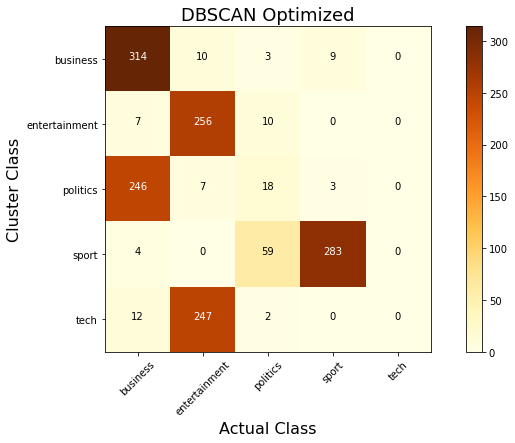

In [53]:
cm = newCm
rows, cols = linear_sum_assignment(cm, maximize=True)
new_cm = cm[rows[:,np.newaxis], cols]
plot_contingency_table(new_cm, title= 'DBSCAN Optimized')

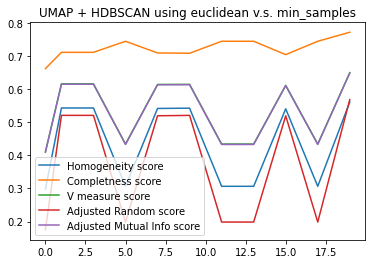

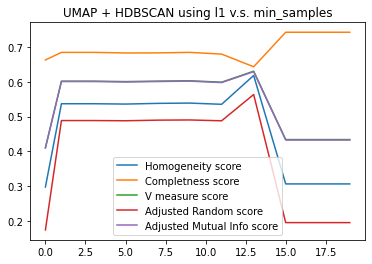

In [49]:
#HDBSCAN  

import hdbscan

umap_homos = []
umap_comp = []
umap_v_measure = []
umap_adj_rand = []
umap_adj_mutual_info = []

# pVals = [None, 1, 0.25] all the same
metrics = ["euclidean", "l1"]
min_sampleVals = [None] + list(range(1, 20, 2))

for metric_ in metrics:
    for min_samplesVal in min_sampleVals:
        clustering = hdbscan.HDBSCAN(metric=metric_, min_samples=min_samplesVal, min_cluster_size=100)
        clustering_data = clustering.fit(umap_dataset)
        
        umap_homos.append(homogeneity_score(cat_index_a, clustering_data.labels_))
        umap_comp.append(completeness_score(cat_index_a, clustering_data.labels_))
        umap_v_measure.append(v_measure_score(cat_index_a, clustering_data.labels_))
        umap_adj_rand.append(adjusted_rand_score(cat_index_a, clustering_data.labels_))
        umap_adj_mutual_info.append(adjusted_mutual_info_score(cat_index_a, clustering_data.labels_))

interval = len(min_sampleVals)
modMin_sampleVals = [0] + min_sampleVals[1:]
for index, metric_ in enumerate(metrics):
    plt.title('UMAP + HDBSCAN using ' + metric_ + " v.s. min_samples") 
    plt.plot(modMin_sampleVals, umap_homos[index*interval:(index+1)*interval], label='Homogeneity score')
    plt.plot(modMin_sampleVals, umap_comp[index*interval:(index+1)*interval], label='Completness score')
    plt.plot(modMin_sampleVals, umap_v_measure[index*interval:(index+1)*interval], label='V measure score')
    plt.plot(modMin_sampleVals, umap_adj_rand[index*interval:(index+1)*interval], label='Adjusted Random score')
    plt.plot(modMin_sampleVals, umap_adj_mutual_info[index*interval:(index+1)*interval], label='Adjusted Mutual Info score')
    plt.legend(loc='best')
    plt.show()

Homogeneity score:  0.30545968630399917
Completeness score:  0.8902094438587983
V-measure score:  0.45484673076562937
Adjusted Rand score:  0.23571048002469255
Adjusted mutual information score:  0.45416378903948973


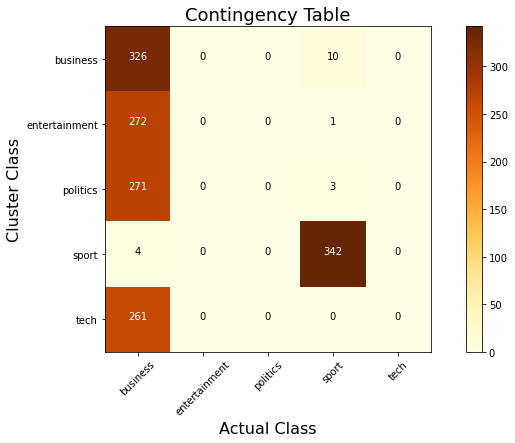

In [55]:
#HDBSCAN Contingency Matrix and Scores

clustering = hdbscan.HDBSCAN(min_cluster_size=100, metric="euclidean", min_samples=20)
clustering_data = clustering.fit(umap_dataset)

cat_index_a=np.array(cat_index)
y_true = cat_index_a
y_pred = clustering.fit_predict(umap_dataset)
print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

cm = confusion_matrix(cat_index_a, clustering_data.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True) 
x=cm[rows[:, np.newaxis], cols]
plot_contingency_table(x)

In [94]:
#TEST DATA FEATURE ENGINEERING

#CountVectorizer Setup
vectorize = CountVectorizer(min_df=4, max_df=600, stop_words=combined_stopwords)
vec_train_docs=vectorize.fit_transform(train_docs)
vec_test_docs=vectorize.transform(test_docs)
train_tfidf = tfidf_transformer.fit_transform(vec_train_docs)
test_tfidf = tfidf_transformer.transform(vec_test_docs)

NMF complete after 1.074243 seconds


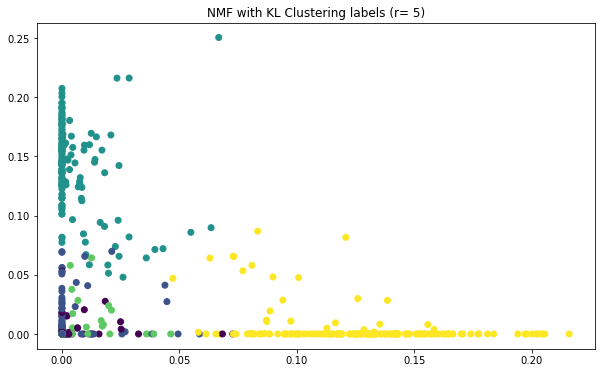

In [119]:
#USING NMF WITH KULLBACK-LEIBLER, r=5 ON TEST DATASET

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
nmf_dataset_t, nmf = nmf_dimension_reduction(test_tfidf, n_components = 5, solver='mu', beta_loss='kullback-leibler', max_iter=1000, random_state=0)

r_best_nmf = 5

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=90)

nmf_labels = km.fit_predict(nmf_dataset_t)
plt.figure(figsize=(10, 6))
plt.scatter(nmf_dataset_t[:,0],nmf_dataset_t[:,1],c=nmf_labels,cmap='viridis')
plt.title("NMF with KL Clustering labels (r= %i)" %r_best_nmf);

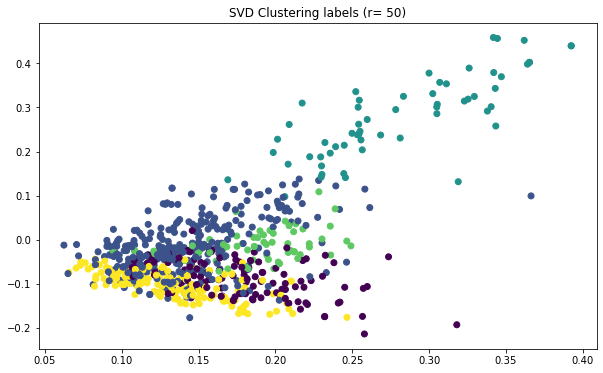

In [112]:
#trying out SVD for test dataset 

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

r_best_svd = 50
#r_best_nmf = 5

svd = TruncatedSVD(n_components=1000,random_state=0)
X_test_svd = svd.fit_transform(test_tfidf)
reduced_data_svd = TruncatedSVD(n_components=r_best_svd,random_state=0).fit_transform(X_test_svd)

km = KMeans(n_clusters=5, random_state=0, max_iter=1000, n_init=30)
svd_labels = km.fit_predict(reduced_data_svd)
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=svd_labels,cmap='viridis')
plt.title("SVD Clustering labels (r= %i)" %r_best_svd);

